In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

In [25]:
#load dataset
wine_columns=['label','alcohol', 'malic_acid','ash','alcalinity','magnesium','phenol','flavanoids','nonfla_penols',
              'proath_c','color','hue','od280','proline']
df = pd.read_csv('../data/wine.data', names=wine_columns)
df.sample(5)

,label,alcohol,malic_acid,ash,alcalinity,magnesium,phenol,flavanoids,nonfla_penols,proath_c,color,hue,od280,proline
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
103,2,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
37,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105


## 1 Explantory data analysis
###1.1 basic description
There are 178 data entries in the dataset, each data point has 13 attributes and one class label, the name and 
definition of the attributes are defined as following:

1. Alcohol (alcohol): the amount of alcohol contains
2. Malic acid (malic_acid): a organic acid the produce the flavor of sour taste of fruit
3. Ash (ash): inorganic matter that remains after evaporation and incineration
4. Alcalinity of ash (alcalinity): The alkalinity of the ash is defined as the sum of cations, other than the ammonium 
ion, combined with the organic acids in the wine. The alkalinity of ash will be expressed in milliequivalents per litre 
or in grams per litre of potassium carbonate.
5. Magnesium (magnesium): is a metal element that might be good at health. Some material suggests that it's related to 
ash
6. Total Phenols (phenols): responsible for most flavor and body of the wine, consists of following three parts: 
Benzaldehyde (vanillin) and Benzoic acid (Vanillic and Gallic acids); Catechins(largest quantity of phenols); Resveratrol 
7. Flavanoids (flavanoids):  antioxidants. Antioxidants help prevent certain molecules, known as free radicals, from 
damaging cells.
8. Nonflavaniod phenols (nonfla_penols):phenols that are not flavanoid
9. Proanthocyanins (proath_c) : Proanthocyanidins play an important role in wine; with the capability to bind salivary 
proteins, these condensed tannins strongly influence the perceived astringency of the wine. 
10. Color intensity (color) :  As a very general rule of thumb, the intensity of a wine's color is directly proportional
 to the intensity of the wine's flavor. Paler wines are generally milder while deep rich colors represent more robust 
 flavors.
11. Hue (hue): The hues of red wines range from pink to varying shades of purple. You'll find lighter shades in wines 
such as Beaujolais and Pinot Noir and deeper, darker colors in wines like Cabernet Sauvignon, Syrah, and Merlot.
12. OD280/OD315 of diluted wine (od280): od280 is a measurement that can be used to measure concentrated protein. No 
explanation of od315 has been found, it should be another kind of measurement
13. Proline (proline) : Proline is typically the most abundant amino acid present in grape juice and wine. The amount 
present is influenced by viticultural and winemaking factors and can be of diagnostic importance.

In [ ]:
# check duplication
check_duplication = df.duplicated()
duplicated = df[check_duplication]
print(duplicated)

In [27]:
# check missing value
empty = pd.isnull(df)
has_miss = df[empty]
print(True in has_miss)

False


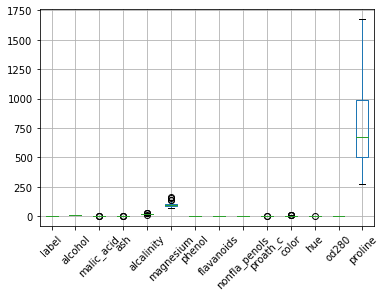

In [40]:
df.boxplot(rot=45)

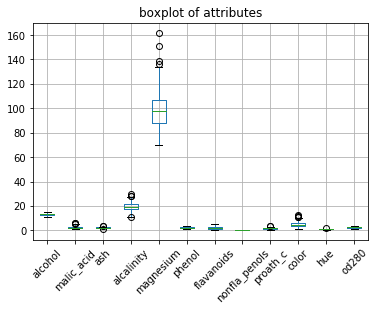

In [28]:
# check outliers
df_ = df.drop(['label','proline'],axis=1)
df_.boxplot(rot=45)
plt.title('boxplot of attributes')
# plt.set_xticklabels(aax.get_xticklabels(), rotation=40, ha="right")
plt.show()

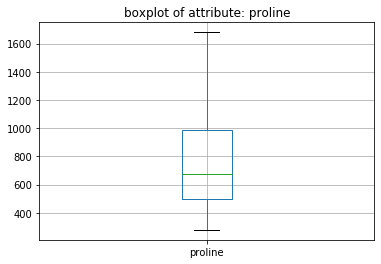

In [29]:
df_ = df['proline'].to_frame()
df_.boxplot()
plt.title('boxplot of attribute: proline')
plt.show()

As we can see from the plots, outliers exits in the following attributes: Malic acid (malic_acid), ash, (Alcalinity of ash) alcalinity, 
Proanthocyanins(proath_c), color intensity (color), hue.
The following section select the outliers based on these attributes with interquantile range

In [38]:
# select the suspicious columns
suspicious_attributes = df[['malic_acid', 'ash','alcalinity', 'proath_c','color','hue']]
Q1 = suspicious_attributes.quantile(0.25)
Q3 = suspicious_attributes.quantile(0.75)
iqr = Q3 - Q1
lower_bound = Q1-1.5*iqr
upper_bound = Q3+1.5*iqr
#outliers = adult_numrics[((adult_numrics<lower_bound) | (adult_numrics>upper_bound)).any(axis=1)]
outliers = suspicious_attributes[((suspicious_attributes<lower_bound)|(suspicious_attributes>upper_bound)).any(axis=1)]
print(outliers)
inliner_df = df.drop(outliers.index)
print(len(inliner_df.index))
# we will simply keep the outliers

     malic_acid   ash  alcalinity  proath_c  color   hue
25         2.05  3.22        25.0      1.92   3.58  1.13
59         0.94  1.36        10.6      0.42   1.95  1.05
73         1.67  2.60        30.0      1.96   3.35  1.31
95         1.52  2.20        19.0      3.28   2.60  1.16
110        3.74  1.82        19.5      3.58   2.90  0.75
115        1.51  2.20        21.5      2.01   1.90  1.71
121        2.05  3.23        28.5      1.87   6.00  0.93
123        5.80  2.13        21.5      2.01   2.60  0.73
127        2.13  2.78        28.5      1.76   3.00  0.97
137        5.51  2.64        25.0      1.10   5.00  0.82
151        2.67  2.48        22.0      1.26  10.80  0.48
158        1.68  2.70        25.0      2.70  13.00  0.57
159        1.67  2.64        22.5      2.29  11.75  0.57
166        3.70  2.60        23.0      1.46  10.68  0.85
173        5.65  2.45        20.5      1.06   7.70  0.64
163


In [ ]:
#find attribute dependency
#TODO

# 2. Data Preprocessing

# Reference
[1] http://www.wineeducation.com/wineismadeof.html
[2] https://www.institut-heidger.de/en/asche-summe-aller-mineralstoffe/
[3] https://www.verywellhealth.com/red-wine-and-longevity-2224017
[4] https://www.chron.com/news/health/article/The-skinny-on-red-wine-and-magnesium-1806764.php